In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def gray_world_balance(image):
    """Баланс белого по алгоритму 'Серый мир'."""
    avg_bgr = np.mean(image, axis=(0, 1))
    gain = np.mean(avg_bgr) / avg_bgr
    white_balanced_img = (image * gain).clip(0, 255).astype(np.uint8)
    return white_balanced_img

In [20]:
def convert_to_lab_and_normalize(image):
    """Преобразование изображения в LAB и нормализация L-компонента."""
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    l, a, b = cv2.split(lab_image)
    l[:] = 50  # установка L-компонента в 50 для всех пикселей
    normalized_lab = cv2.merge([l, a, b])
    return cv2.cvtColor(normalized_lab, cv2.COLOR_Lab2BGR)

In [21]:
def apply_clahe(image):
    """Применение CLAHE для улучшения контрастности изображения."""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab[:, :, 0] = clahe.apply(lab[:, :, 0])
    return cv2.cvtColor(lab, cv2.COLOR_Lab2BGR)

In [22]:
# Словарь с данными
test_samples_lab = {
    (235, 223): 8.0,
    (232, 217): 7.7,
    (220, 119): 7.5,
    (225, 126): 7.2,
    (228, 234): 6.9,
    (236, 127): 6.5,
    (220, 235): 6.3,
    (207, 234): 6.0,
    (174, 234): 5.7,
}

In [23]:
# Загрузка изображения
image_path = 'image/5.7.png'
image = cv2.imread(image_path)

In [24]:
# Применение предобработки
white_balanced_image = gray_world_balance(image)
lab_normalized_image = convert_to_lab_and_normalize(white_balanced_image)
final_image = apply_clahe(lab_normalized_image)

In [25]:
# Вычисление среднего LAB цвета изображения
lab_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2Lab)
mean_lab_color = np.mean(lab_image.reshape(-1, 3), axis=0)

In [26]:
# Поиск ближайшего значения pH
a_b_values = np.array([values[1:] for values in test_samples_lab.keys()])  # Извлекаем только a и b компоненты
distances = np.linalg.norm(a_b_values - mean_lab_color[1:], axis=1)
nearest_index = np.argmin(distances)
nearest_ph_value = list(test_samples_lab.values())[nearest_index]

In [27]:
print(f"Estimated pH: {nearest_ph_value}")

Estimated pH: 6.5


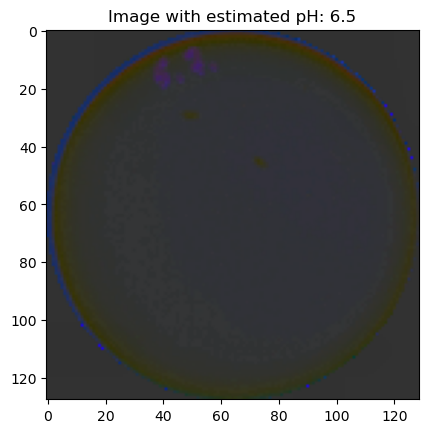

In [28]:
# Визуализация результатов
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title(f'Image with estimated pH: {nearest_ph_value}')
plt.show()

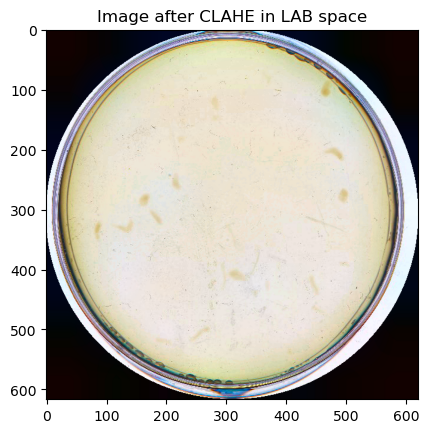

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_clahe_to_lab(image):
    """Применение CLAHE к каждому каналу изображения в LAB пространстве."""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab[:, :, 0] = clahe.apply(lab[:, :, 0])  # Применяем CLAHE к L-компоненте
    lab[:, :, 1] = clahe.apply(lab[:, :, 1])  # Применяем CLAHE к A-компоненте
    lab[:, :, 2] = clahe.apply(lab[:, :, 2])  # Применяем CLAHE к B-компоненте
    return cv2.cvtColor(lab, cv2.COLOR_Lab2BGR)

# Загрузка изображения
image_path = 'image/6.5.png'  # Замените на путь к вашему изображению
image = cv2.imread(image_path)

# Проверка, загружено ли изображение
if image is None:
    raise ValueError("Image not found")

# Применение адаптивного выравнивания гистограммы ко всему изображению в LAB
final_image = apply_clahe_to_lab(image)

# Визуализация результатов
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('Image after CLAHE in LAB space')
plt.show()
